### Library Needed

In [27]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from sklearn.metrics import mean_squared_error, r2_score

### Load Data

In [28]:
  data = pd.read_excel("https://docs.google.com/spreadsheets/d/1uAGZc9EPHzUxZNn6ZB411k7swkWqakfe/export?format=xlsx", engine = "openpyxl")
  data.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144
0,1863,1614,2570,1685,2101,1811,2457,2171,2134,2502,...,14917,15046,15556,15893,16388,16782,16716,17033,16896,17689


## N0. 1
FInd the best model for find trend from dataset

### Data Preparation

In [29]:
# rubah dataframe jadi list (1D)
rata = data.values.flatten()
# buat indeks t dari 1 - 144
t = np.arange(1, len(rata) + 1)

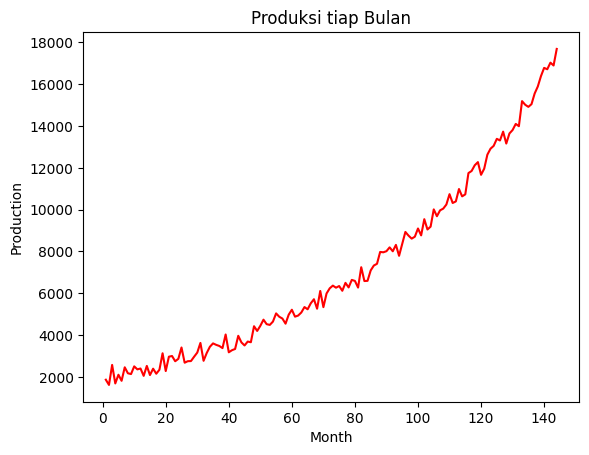

In [30]:
# visual data awal actual dengan plt
# plt.plot(t, rata, "bo")
plt.plot(t, rata, "r-")
plt.title("Produksi tiap Bulan")
plt.xlabel("Month")
plt.ylabel("Production")
plt.show()

### Model

In [31]:
# model-model non-linear
def polynomialDegree2(index, a, b, c):
    return a*index**2 + b*index + c

def polynomialDegree3(index, a, b, c, d):
    return a*index**3 + b*index**2 + c*index + d

def exponential(index, a, b, c):
    # ln(y) = A + Bx
    # y = e^(A + Bx)
    # y = e^A * e^(B*x)
    # e^A = a
    # B = b
    # y = a * e^(bx)
    return np.exp(a + b * index)

def logisticGrowth(index, l, k, index0):
    return l / (1 + np.exp(-k*(index - index0)))

cs = CubicSpline(t, rata)

### Optimal Parameters

param_expo sebagai penampung parameter optimal dari model exponential, <br>dan "_" underscore digunakan untuk menampung variabel confidence interval (tidak dipakai)

In [32]:
# fit dengan curve_fit
# curve_fit bekerja untuk mencari variabel terbaik yang dibutuhkan dari suatu model matematis
param_expo, _ = curve_fit(exponential, t, rata, maxfev = 10000)
yExpo = exponential(t, *param_expo)

param_pd2, _ = curve_fit(polynomialDegree2, t, rata)
yPD2 = polynomialDegree2(t, *param_pd2)

param_pd3, _ = curve_fit(polynomialDegree3, t, rata)
yPD3 = polynomialDegree3(t, *param_pd3)

p0 = [30000,0.04,70]

param_logis, _ = curve_fit(logisticGrowth, t, rata, p0=p0, bounds=([10000, 0, 1], [50000, 1, 200]), maxfev=20000)
yLG = logisticGrowth(t, *param_logis)

yCS = cs(t)

/tmp/ipython-input-159532990.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  param_expo, _ = curve_fit(exponential, t, rata, maxfev = 10000)


### Model Evaluation

RMSE (Root Mean Squared Error): <br>
RMSE kecil = mendekati data asli, error kecil <br>
RMSE besar = menjauhi data asli, error besar <br>

R2Score = mengitung varian atau besar variasi yang dijelaskan model <br>
dengan poin 0 sampai 1

In [33]:
# fungsi untuk evaluasi model
def evaluasi(actual, approx):
    return {
        "RMSE" : np.sqrt(mean_squared_error(actual, approx)),
        "R2S" : r2_score(actual, approx)
    }

eval_expo = evaluasi(rata, yExpo)
eval_pd2 = evaluasi(rata, yPD2)
eval_pd3 = evaluasi(rata, yPD3)
eval_logis = evaluasi(rata, yLG)
eval_cs = evaluasi(rata, yCS)

print(f"Evaluasi model exponential: {eval_expo} \nEvaluasi model polynomial degree 2: {eval_pd2} \
      \nEvaluasi model polynomial degree 3: {eval_pd3} \nEvaluasi model logistic growth {eval_logis} \
      \nEvaluasi model cubic spline: {eval_cs}")

Evaluasi model exponential: {'RMSE': np.float64(287.4919138181738), 'R2S': 0.9956116205284851} 
Evaluasi model polynomial degree 2: {'RMSE': np.float64(361.50875720660304), 'R2S': 0.993061101239008}       
Evaluasi model polynomial degree 3: {'RMSE': np.float64(288.43565486960654), 'R2S': 0.9955827620372667} 
Evaluasi model logistic growth {'RMSE': np.float64(338.27580595117416), 'R2S': 0.9939243215413475}       
Evaluasi model cubic spline: {'RMSE': np.float64(0.0), 'R2S': 1.0}


### Visualization

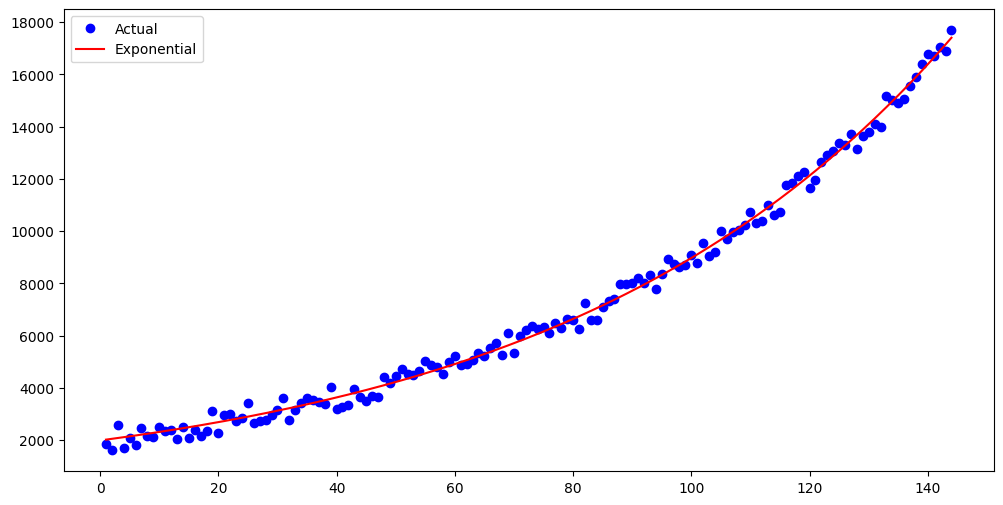

In [34]:
plt.figure(figsize = (12, 6))
plt.plot(t, rata, "bo", label = "Actual")
plt.plot(t, yExpo, "r-", label = "Exponential")
plt.legend()
plt.show()

# tidak ikut dibandingkan karena kemampuan mencari varian nya rendah

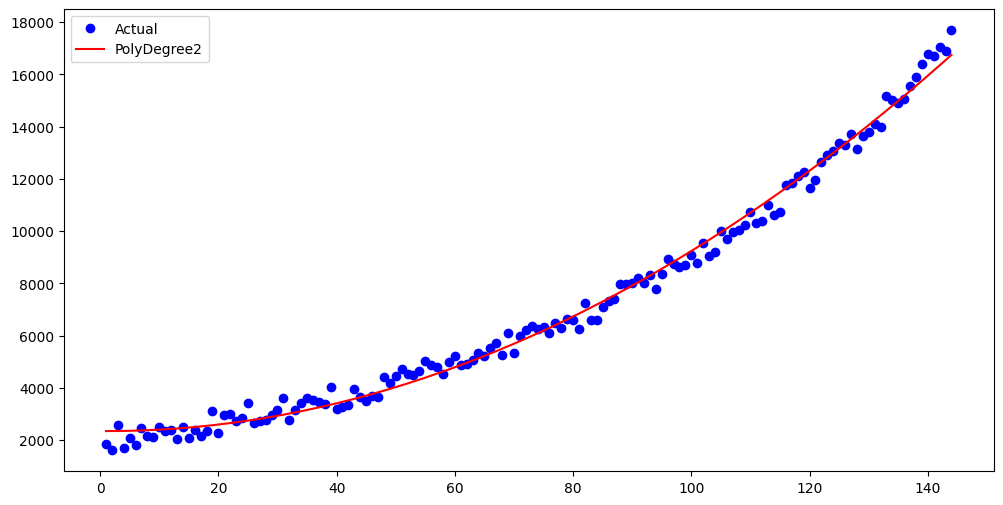

In [35]:
plt.figure(figsize = (12, 6))
plt.plot(t, rata, "bo", label = "Actual")
plt.plot(t, yPD2, "r-", label = "PolyDegree2")
plt.legend()
plt.show()

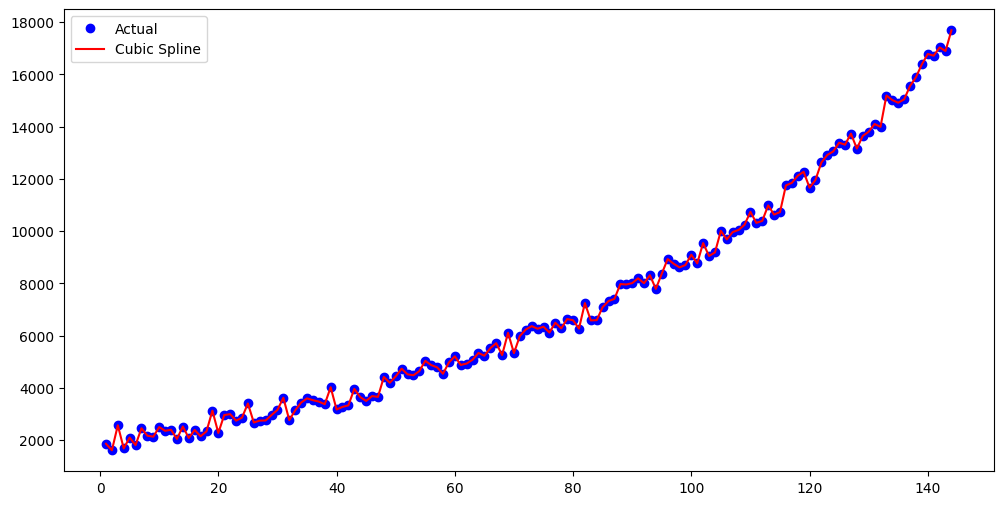

In [36]:
plt.figure(figsize = (12, 6))
plt.plot(t, rata, "bo", label = "Actual")
plt.plot(t, yCS, "r-", label = "Cubic Spline")
plt.legend()
plt.show()

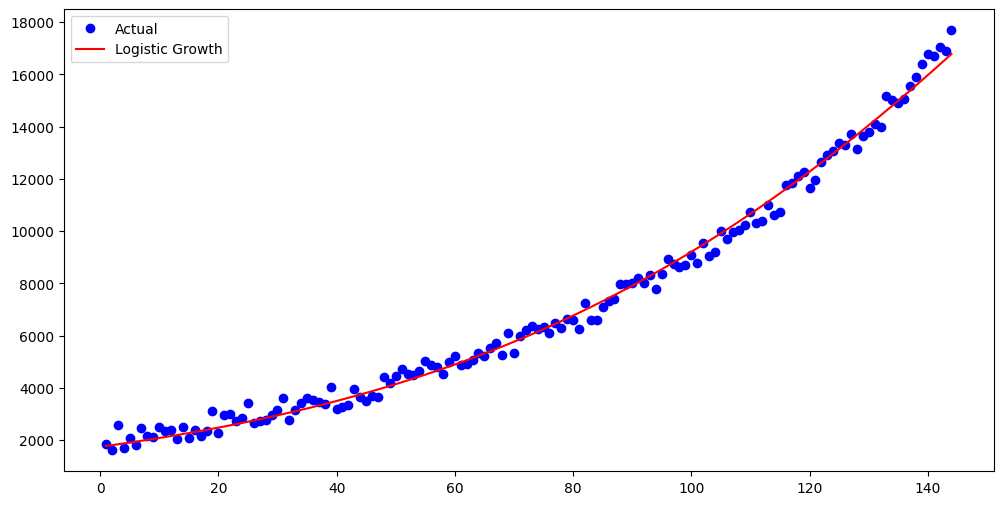

In [37]:
plt.figure(figsize = (12, 6))
plt.plot(t, rata, "bo", label = "Actual")
plt.plot(t, yLG, "r-", label = "Logistic Growth")
plt.legend()
plt.show()

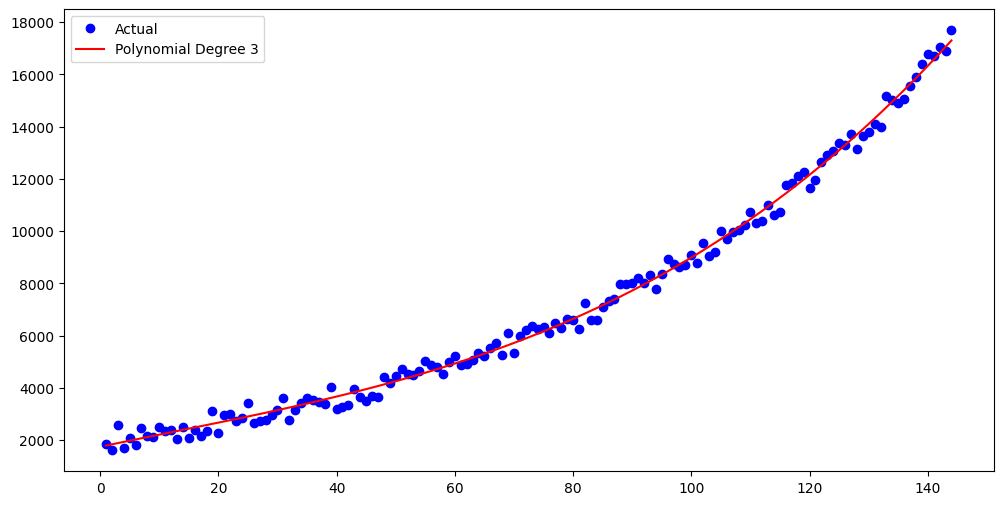

In [38]:
plt.figure(figsize = (12, 6))
plt.plot(t, rata, "bo", label = "Actual")
plt.plot(t, yPD3, "r-", label = "Polynomial Degree 3")
plt.legend()
plt.show()

### Interpretasi

Based on the RMSE and R² score test results, it was found that:

- Cubic Spline is the most accurate model; however, it does not produce an explicit mathematical model, only a smooth curve that follows the original data trend.

- Exponential is the second-best model and is able to generate a mathematical model (y = a·e^(b·x)).

This is followed by Polynomial Degree 3, Logistic Growth, and Polynomial Degree 2.<br><br>
Overview of the evaluation results:<br>
Cubic Spline (no mathematical model) > Exponential > Polynomial Degree 3 > Logistic Growth > Polynomial Degree 2

Dari hasil test RMSE dan R2Score maka didapatkan bahwa:<br>
- Cubic Spline menjadi model paling sempurna tetapi tidak menghasilkan model matematis, hanya garis yang halus (mengikuti arah data asli)<br>
- Exponential menjadi model terbaik kedua dan dapat menghasilkan model matematis (y = a*e^(b*x)) <br>
diikuti dengan Polynomial Degree 3, Logistic Growth, dan Polynomial Degree 2

Gambaran hasil evaluasi : <br>
Cubic Spline (Tanpa model matematis) > Exponential > Polynomial Degree 3 > Logistic Growth > Polynomial Degree 2

## No. 2

### Data Preparation

In [39]:
y = data.values.flatten().astype(np.float64)

t = np.arange(1, len(y) + 1)

### Exponential Model (Non-Linear)

In [40]:
def model_exponential(x, a, b):
    return a * np.exp(b * x)

### Numerical Form (Approximation)

In [41]:
z = np.log(y)
B, A = np.polyfit(t, z, 1)
a = np.exp(A)
b = B

print(f"Intercept = {a: .4f} \
      \nSlope = {b: .4f}")

Intercept =  1937.0139       
Slope =  0.0153


### Evaluation

In [42]:
y_hat = model_exponential(t, a, b)

rmse = np.sqrt(mean_squared_error(y, y_hat))
r2   = r2_score(y, y_hat)

print(f"RMSE = {rmse: .4f}\nR2 = {r2: .4f}")

RMSE =  298.1797
R2 =  0.9953


### Taylor Series Plot

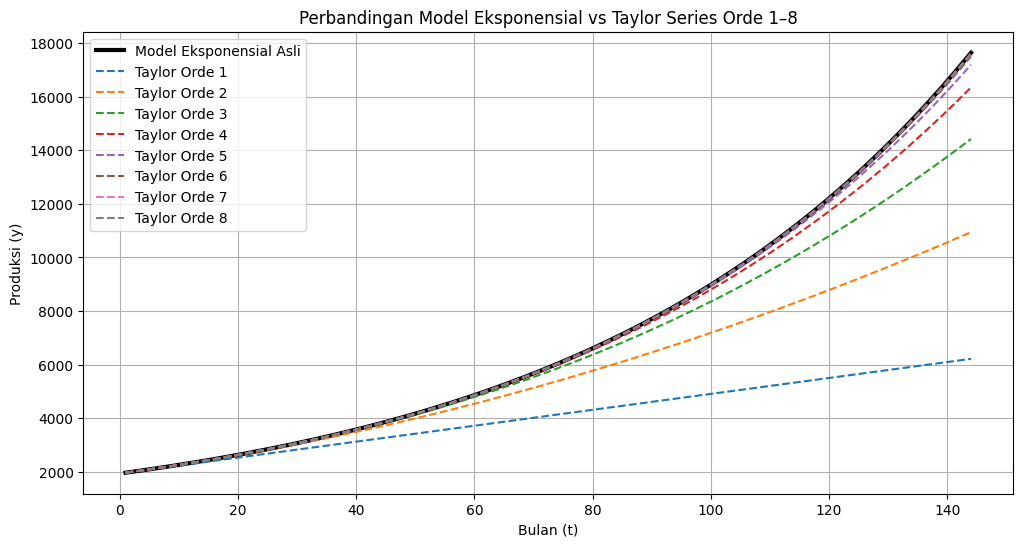

In [43]:
# -------------------------------------
# Model eksponensial asli
# -------------------------------------
def model_exp(x, a, b):
    return a * np.exp(b * x)

# -------------------------------------
# Aproksimasi Taylor orde-n
# -------------------------------------
def model_taylor(x, a, b, n):
    x = np.asarray(x)
    u = b * x
    s = np.ones_like(u)
    term = np.ones_like(u)
    for k in range(1, n + 1):
        term = term * (u / k)
        s += term
    return a * s

# -------------------------------------
# Parameter contoh model hasil regresi
# -------------------------------------
a = a # 1937.0139
b = b # 0.0153

x = np.arange(1, 145)

# Model asli
y_exp = model_exp(x, a, b)

# -------------------------------------
# Plot semua orde Taylor 1 sampai 8
# -------------------------------------
plt.figure(figsize=(12, 6))

plt.plot(x, y_exp, label="Model Eksponensial Asli", linewidth=3, color='black')

# Loop Taylor order 1..8
for n in range(1, 9): # untuk merubah sampai order ke n, bisa ganti 9 jadi n + 1 untuk sampai order ke-n
    y_taylor_n = model_taylor(x, a, b, n)
    plt.plot(x, y_taylor_n, label=f"Taylor Orde {n}", linestyle='--')

plt.xlabel("Bulan (t)")
plt.ylabel("Produksi (y)")
plt.title("Perbandingan Model Eksponensial vs Taylor Series Orde 1–8")
plt.legend()
plt.grid(True)
plt.show()


## N0.3

In [44]:
import numpy as np
from scipy.optimize import fsolve

def f(t):
    return a*np.exp(b*t) - 25000

t_solution = fsolve(f, x0=100)  # tebakan awal 100
print(t_solution)


[166.73243608]


In [45]:
target = 25000.0

if a <= 0:
    raise ValueError("Parameter a non-positive, check data/regression.")
if b == 0:
    print("b == 0 (no exponential growth). No crossing unless a == target.")
    t_cross = np.inf
else:
    t_cross = (math.log(target / a)) / b

print("Predicted crossing t (months index):", t_cross)

Predicted crossing t (months index): 166.73243607862597


In [48]:
if np.isfinite(t_cross):
    # If crossing already in past (t_cross <= 0) or equals:
    if t_cross <= 0:
        print("Model predicts capacity >= target at or before M1.")
        S = 1
    else:
        S = int(math.floor(t_cross - 13))
        if S < 1:
            S = 1
else:
    S = None

print("Start building month index S:", S)

# ---------------------------
# 5) Convert month index to calendar date
# M1 corresponds to January 2018
start_year = 2018
start_month = 1

def month_index_to_date(m_index):
    # m_index: 1-based month index (M1=1)
    # return (year, month)
    total_months = (start_month - 1) + (m_index - 1)  # months offset from Jan 2018
    year = start_year + (total_months // 12)
    month = (total_months % 12) + 1
    return year, month

if S is not None:
    year_S, month_S = month_index_to_date(S)
    print(f"Start Building (index {S}) => {month_S:02d}-{year_S}")
    # Juga tampilkan perkiraan kapan gudang akan terlampaui (t_cross) dan konversi
    # Untuk t_cross bisa jadi pecahan; tampilkan bulan/tahun untuk bagian integer (floor of t_cross)
    t_floor = int(math.floor(t_cross))
    year_T, month_T = month_index_to_date(max(1, t_floor))
    print(f"Production is projected to exceed 25k at t ≈ {t_cross:.2f}, which corresponds to around {month_T:02d}-{year_T}")
else:
    print("Tidak ada prediksi crossing (t_cross tidak terdefinisi).")


Start building month index S: 153
Start Building (index 153) => 09-2030
Production is projected to exceed 25k at t ≈ 166.73, which corresponds to around 10-2031
